<a href="https://colab.research.google.com/github/bilik49/statistical_analysis/blob/main/criteria_equivalence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [191]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [192]:
def z(a):
  return stats.norm.ppf(a)

In [193]:
eps = 0.01
delta = 0.25
alpha = 0.05
beta = 0.20
std = 0.42
# std = 1
n = 26

Пусть $f1 = \Phi(-z_{1-α}+\frac{δ-ϵ}{S})+\Phi(-z_{1-α}+\frac{δ+ϵ}{S})-1 \\
f2 = 2\Phi(-z_{1-α}+\frac{δ-|ϵ|}{S})-1$  
Посмотрим при заданных $\epsilon = 0.01, \delta = 0.25, \alpha = 0.05, \beta = 0.20, σ = 0.42$  
разницу между $n_{f1}$ и $n_{f2}$

In [194]:
nrange = np.arange(10,50)

In [195]:
S = std / np.sqrt(nrange)
power_f1 = stats.norm.cdf(-z(1-alpha) + (delta - eps) / S) + stats.norm.cdf(-z(1-alpha) + (delta + eps) / S) - 1
power_f2 = 2 * stats.norm.cdf(-z(1 - alpha) + (delta - np.abs(eps)) / S) - 1

In [196]:
n_f1 = nrange[np.argwhere(power_f1 > 1 - beta)[0][0]]
n_f2 = nrange[np.argwhere(power_f2 > 1 - beta)[0][0]]

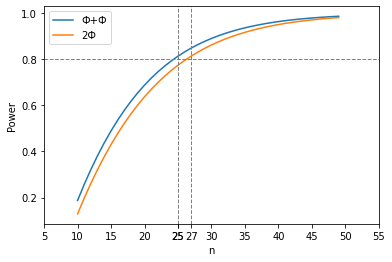

In [197]:
ax = sns.lineplot(x = nrange, y = power_f1, label = "Ф+Ф")
ax = sns.lineplot(x = nrange, y = power_f2, label = "2Ф")
ax.set(xlabel="n", ylabel="Power")
ax.axhline(y = 1 - beta, color='gray', linestyle='--', lw=1)
ax.axvline(x = n_f1, color='gray', linestyle='--', lw=1)
ax.axvline(x = n_f2, color='gray', linestyle='--', lw=1)
ax.set_xticks(list(ax.get_xticks()) + [n_f1,n_f2])
plt.legend()
plt.show()

При фиксированных $\epsilon = 0.01, \delta = 0.25, \alpha = 0.05, \beta = 0.20, σ = 0.42$  
находим, что $n_{f1}=25$ и $n_{f2}=27$.

Посмотрим влияние остальных параметров на разницу между $f1$ и $f2$.

In [198]:
stdrange = np.arange(0.1,2,0.01)

In [199]:
S = stdrange / np.sqrt(n)
power_f1 = stats.norm.cdf(-z(1-alpha) + (delta - eps) / S) + stats.norm.cdf(-z(1-alpha) + (delta + eps) / S) - 1
power_f2 = 2 * stats.norm.cdf(-z(1 - alpha) + (delta - np.abs(eps)) / S) - 1

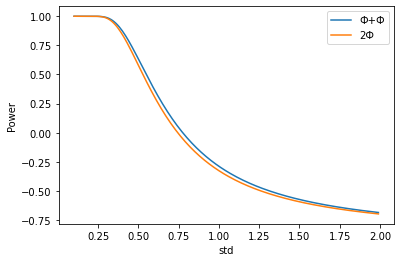

In [200]:
ax = sns.lineplot(x = stdrange, y = power_f1, label = "Ф+Ф")
ax = sns.lineplot(x = stdrange, y = power_f2, label = "2Ф")
ax.set(xlabel="std", ylabel="Power")
plt.legend()
plt.show()

In [201]:
epsrange = np.arange(0.001,0.01,0.001)

In [202]:
S = std / np.sqrt(n)
power_f1 = stats.norm.cdf(-z(1-alpha) + (delta - epsrange) / S) + stats.norm.cdf(-z(1-alpha) + (delta + epsrange) / S) - 1
power_f2 = 2 * stats.norm.cdf(-z(1 - alpha) + (delta - np.abs(epsrange)) / S) - 1

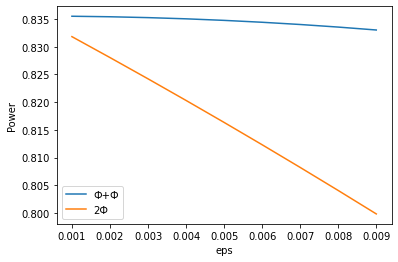

In [203]:
ax = sns.lineplot(x = epsrange, y = power_f1, label = "Ф+Ф")
ax = sns.lineplot(x = epsrange, y = power_f2, label = "2Ф")
ax.set(xlabel="eps", ylabel="Power")
plt.legend()
plt.show()

In [204]:
deltarange = np.arange(0,1,0.01)

In [205]:
S = std / np.sqrt(n)
power_f1 = stats.norm.cdf(-z(1-alpha) + (deltarange - eps) / S) + stats.norm.cdf(-z(1-alpha) + (deltarange + eps) / S) - 1
power_f2 = 2 * stats.norm.cdf(-z(1 - alpha) + (deltarange - np.abs(eps)) / S) - 1

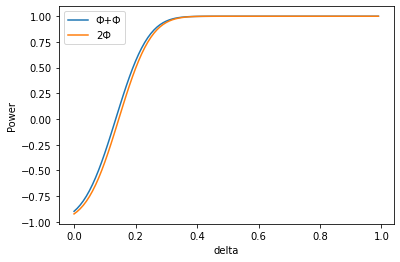

In [206]:
ax = sns.lineplot(x = deltarange, y = power_f1, label = "Ф+Ф")
ax = sns.lineplot(x = deltarange, y = power_f2, label = "2Ф")
ax.set(xlabel="delta", ylabel="Power")
plt.legend()
plt.show()